# "Predict Used Car Prices using Regression"
> "EDA and machine learning (regression)"

- toc: false
- branch: master
- badges: true
- categories: [EDA, ML, regression]
- image: images/cars.jpg
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

Dataset: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes.

In this notebook, I'll try to use machine learning models to predict used car (BMW) price. I'll use regression or linear model as it is the most appropriate algorithm for this case

## Import Module and Preview Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv


I just want to use the BMW dataset, so let's load it.

In [28]:
df_bmw = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv')
df_bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [29]:
df_bmw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Great, there are no missing values!

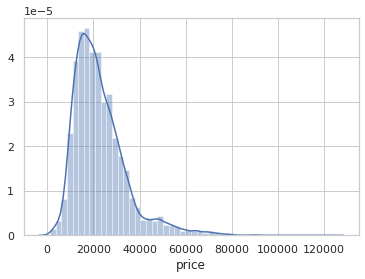

In [30]:
sns.distplot(df_bmw['price'])

We can see that the price distribution is positively skewed, which means that the mean and median are greater than the mode.

## EDA and Prepare Data

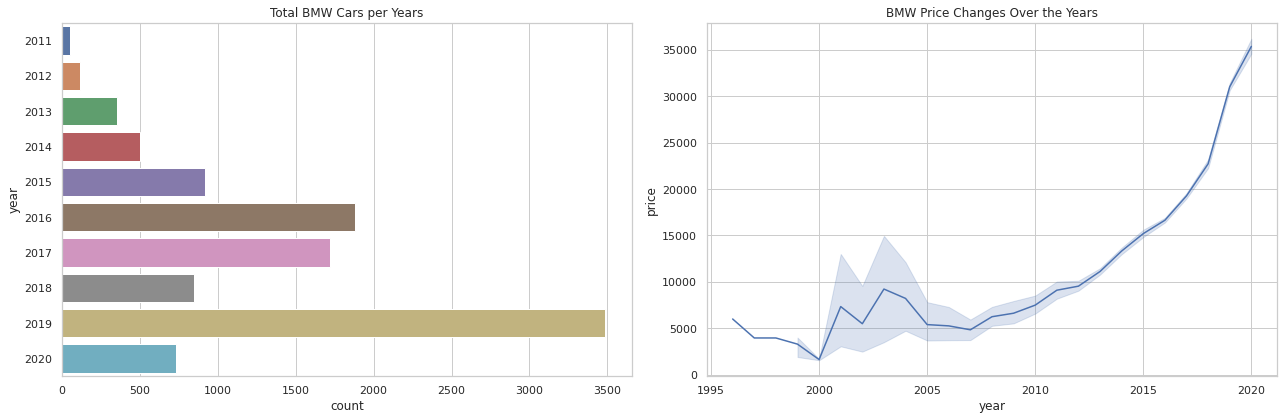

In [31]:
plt.figure(figsize=(18,6))

plt.subplot(121)
sns.countplot(y=df_bmw[df_bmw['year'] > 2010]['year'])
plt.title('Total BMW Cars per Years')

plt.subplot(122)
sns.lineplot(x='year', y='price', data=df_bmw)
plt.title('BMW Price Changes Over the Years')

plt.tight_layout()

The left graph shows that the total BMW cars were increased over the years (especially in 2019 where it rose significantly), while the right graph shows the change of BMW price during the same period. The price varied widely in 2000-2007 period.

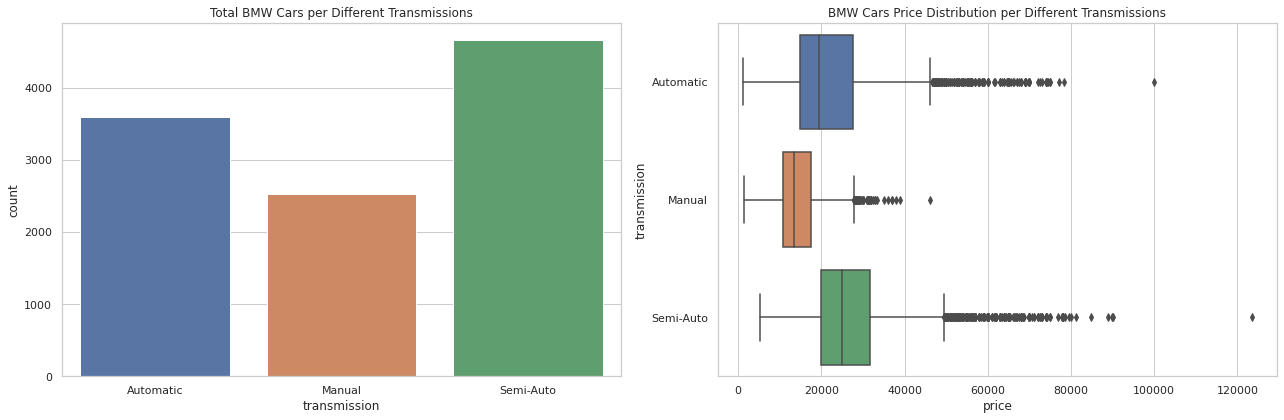

In [32]:
plt.figure(figsize=(18,6))

plt.subplot(121)
sns.countplot(df_bmw['transmission'])
plt.title('Total BMW Cars per Different Transmissions')

plt.subplot(122)
sns.boxplot(x='price', y='transmission', data=df_bmw, orient='h')
plt.title('BMW Cars Price Distribution per Different Transmissions')

plt.tight_layout()

Both graphs show that BMW cars mostly use Semi-Auto transmission, followed by Automatic and Manual. The price distribution follow the same pattern too.

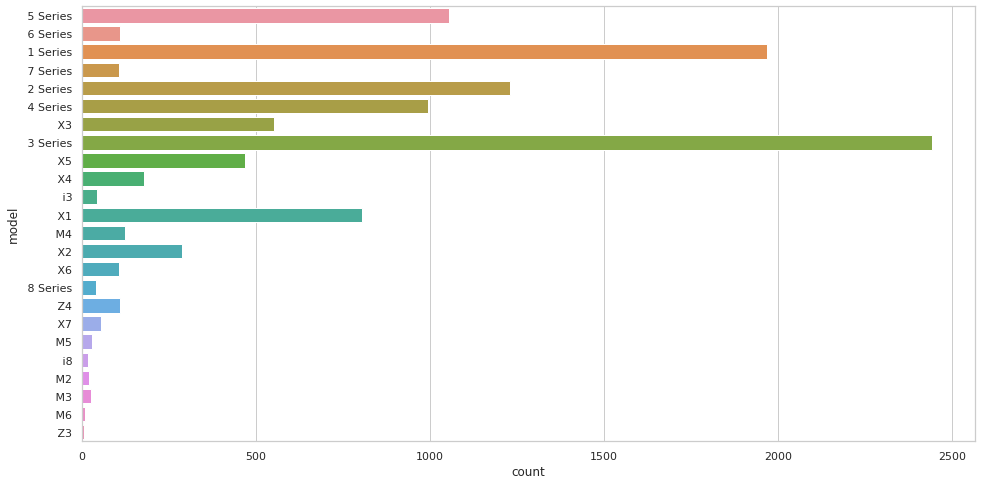

In [33]:
plt.figure(figsize=(16,8))
sns.countplot(y=df_bmw['model'])

The graph shows the BMW 3 Series is the most popular used cars.

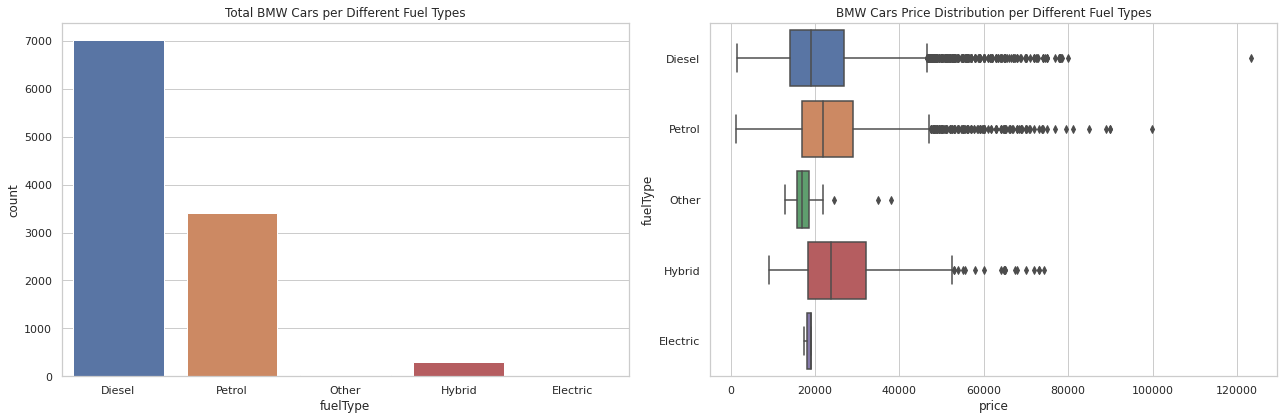

In [34]:
plt.figure(figsize=(18,6))

plt.subplot(121)
sns.countplot(df_bmw['fuelType'])
plt.title('Total BMW Cars per Different Fuel Types')

plt.subplot(122)
sns.boxplot(x='price', y='fuelType', data=df_bmw, orient='h')
plt.title('BMW Cars Price Distribution per Different Fuel Types')

plt.tight_layout()

There are more BMW cars with diesel fuel than petrol, but those who use petrol are usually more expensive cars. Hybrid is much less than both diesel and petrol, and usually more expensive too.

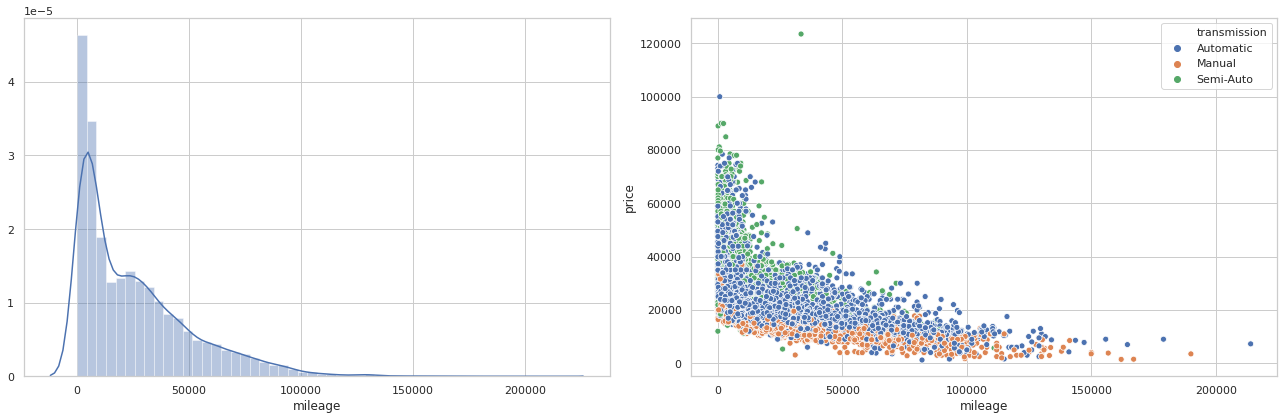

In [35]:
plt.figure(figsize=(18,6))

plt.subplot(121)
sns.distplot(df_bmw['mileage'])

plt.subplot(122)
sns.scatterplot(x='mileage', y='price', data=df_bmw, hue='transmission')

plt.tight_layout()

There are no semi-auto cars with mileage greater than 100k, and no manual cars priced above 40k.

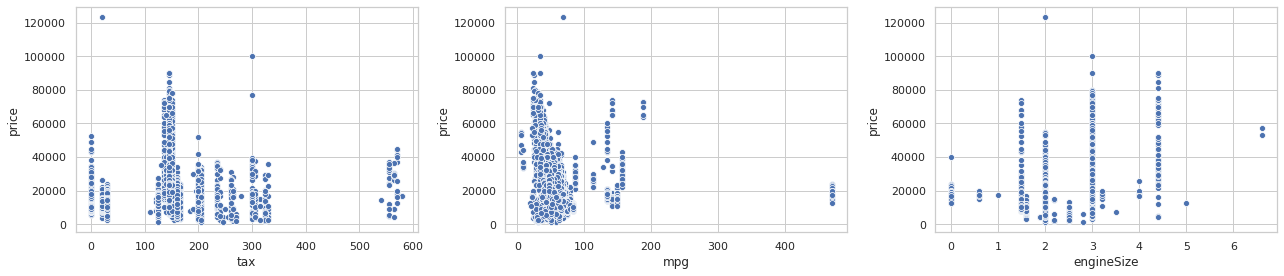

In [36]:
plt.figure(figsize=(18,4))

plt.subplot(131)
sns.scatterplot(x='tax', y='price', data=df_bmw)

plt.subplot(132)
sns.scatterplot(x='mpg', y='price', data=df_bmw)

plt.subplot(133)
sns.scatterplot(x='engineSize', y='price', data=df_bmw)

plt.tight_layout()

There are no interesting point here, as both tax, mpg, engineSize, don't have a pattern to looked at.

Now lets change year column into car age.

In [37]:
df_bmw['car_age'] = 2020 - df_bmw['year']
df_bmw.drop(columns='year', inplace=True)
df_bmw.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
0,5 Series,11200,Automatic,67068,Diesel,125,57.6,2.0,6
1,6 Series,27000,Automatic,14827,Petrol,145,42.8,2.0,2
2,5 Series,16000,Automatic,62794,Diesel,160,51.4,3.0,4
3,1 Series,12750,Automatic,26676,Diesel,145,72.4,1.5,3
4,7 Series,14500,Automatic,39554,Diesel,160,50.4,3.0,6


Let's use one hot encoding (pandas.get_dummies) to convert categorical variable (model, transmission, fuelType).

In [38]:
df = pd.get_dummies(df_bmw)
print(df.shape)
df.head()

(10781, 38)


,price,mileage,tax,mpg,engineSize,car_age,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ M2,model_ M3,model_ M4,model_ M5,model_ M6,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ X6,model_ X7,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,11200,67068,125,57.6,2.0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,27000,14827,145,42.8,2.0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,16000,62794,160,51.4,3.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,12750,26676,145,72.4,1.5,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,14500,39554,160,50.4,3.0,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


I'll use StandardScaler, which can transform numerical data to have mean of 0 and standard deviation of 1.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,price,mileage,tax,mpg,engineSize,car_age,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ M2,model_ M3,model_ M4,model_ M5,model_ M6,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ X6,model_ X7,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-1.010373,1.653447,-0.108963,0.038326,-0.303911,1.310782,-0.472700,-0.358698,-0.541291,-0.318867,3.034680,-0.100593,-0.099648,-0.060255,-0.044178,-0.050107,-0.108307,-0.051934,-0.027251,-0.283876,-0.165671,-0.23208,-0.129937,-0.213025,-0.099648,-0.071608,-0.025489,-0.100593,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
1,0.373771,-0.424388,0.216199,-0.433982,-0.303911,-0.392121,-0.472700,-0.358698,-0.541291,-0.318867,-0.329524,9.941030,-0.099648,-0.060255,-0.044178,-0.050107,-0.108307,-0.051934,-0.027251,-0.283876,-0.165671,-0.23208,-0.129937,-0.213025,-0.099648,-0.071608,-0.025489,-0.100593,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,-1.368163,-0.016684,-0.168603,-0.057883,1.468028
2,-0.589874,1.483453,0.460070,-0.159533,1.507591,0.459331,-0.472700,-0.358698,-0.541291,-0.318867,3.034680,-0.100593,-0.099648,-0.060255,-0.044178,-0.050107,-0.108307,-0.051934,-0.027251,-0.283876,-0.165671,-0.23208,-0.129937,-0.213025,-0.099648,-0.071608,-0.025489,-0.100593,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
3,-0.874587,0.046894,0.216199,0.510634,-1.209662,0.033605,2.115507,-0.358698,-0.541291,-0.318867,-0.329524,-0.100593,-0.099648,-0.060255,-0.044178,-0.050107,-0.108307,-0.051934,-0.027251,-0.283876,-0.165671,-0.23208,-0.129937,-0.213025,-0.099648,-0.071608,-0.025489,-0.100593,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
4,-0.721280,0.559104,0.460070,-0.191445,1.507591,1.310782,-0.472700,-0.358698,-0.541291,-0.318867,-0.329524,-0.100593,10.035315,-0.060255,-0.044178,-0.050107,-0.108307,-0.051934,-0.027251,-0.283876,-0.165671,-0.23208,-0.129937,-0.213025,-0.099648,-0.071608,-0.025489,-0.100593,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186


Now let's split the data into train and test data.

In [40]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns='price')
y = df_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

## Linear Model

We'll do feature selection with SelectKBest which can show the best total number of features we use for regression model.

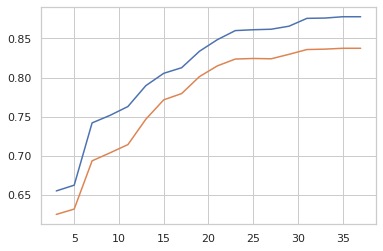

In [41]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

column_names = df_scaled.drop(columns='price').columns

no_of_features = []
r2_train = []
r2_test = []

for k in range(3,38,2):
    selector = SelectKBest(f_regression, k=k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    
    no_of_features.append(k)
    r2_train.append(regressor.score(X_train_transformed, y_train))
    r2_test.append(regressor.score(X_test_transformed, y_test))

sns.lineplot(x=no_of_features, y=r2_train, legend='full')
sns.lineplot(x=no_of_features, y=r2_test, legend='full')

At k=31, the train and test accuracy stop increasing, so we'll use just 31 features.

In [42]:
selector = SelectKBest(f_regression, k=31)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
print(df.columns)
selected_features = column_names[selector.get_support()]
selected_features

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age',
       'model_ 1 Series', 'model_ 2 Series', 'model_ 3 Series',
       'model_ 4 Series', 'model_ 5 Series', 'model_ 6 Series',
       'model_ 7 Series', 'model_ 8 Series', 'model_ M2', 'model_ M3',
       'model_ M4', 'model_ M5', 'model_ M6', 'model_ X1', 'model_ X2',
       'model_ X3', 'model_ X4', 'model_ X5', 'model_ X6', 'model_ X7',
       'model_ Z3', 'model_ Z4', 'model_ i3', 'model_ i8',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')


Index(['mileage', 'tax', 'mpg', 'engineSize', 'car_age', 'model_ 1 Series',
       'model_ 2 Series', 'model_ 3 Series', 'model_ 7 Series',
       'model_ 8 Series', 'model_ M2', 'model_ M3', 'model_ M4', 'model_ M5',
       'model_ X1', 'model_ X2', 'model_ X3', 'model_ X4', 'model_ X5',
       'model_ X6', 'model_ X7', 'model_ Z3', 'model_ Z4', 'model_ i3',
       'model_ i8', 'transmission_Manual', 'transmission_Semi-Auto',
       'fuelType_Diesel', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')

We'll create regression model function that return the regressor object and it's score.

In [43]:
def regression_model(model):
    """
    Fit the regression model passed, then it will return the regressor object and it's score
    """
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

Now we'll try 4 different regression model and assign it to a DataFrame.

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR

model_performance = pd.DataFrame(columns=['Model', 'Score'])
linear_model = [LinearRegression(), Ridge(), SVR(), RandomForestRegressor()]

for model in linear_model:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({'Feature':'Linear', 'Model': model, 'Score': score}, ignore_index=True)

model_performance = model_performance.sort_values('Score', ascending=False)
model_performance

,Model,Score,Feature
3,"(DecisionTreeRegressor(max_features='auto', ra...",0.919794,Linear
2,SVR(),0.896187,Linear
1,Ridge(),0.835793,Linear
0,LinearRegression(),0.835776,Linear


Note: RandomForestRegressor get renamed automatically to DecisionTreeRegressor(...)

## Linear Model with Backward Elimination

Reference for backward elimination: https://medium.com/@mayankshah1607/machine-learning-feature-selection-with-backward-elimination-955894654026

Basically, we'll remove the features with p-value/signifance > 0.05 until there are no features with that condition.

In [45]:
import statsmodels.api as sm

regressor = sm.OLS(y_train, X_train).fit()
print(regressor.summary())

X_train_dropped = X_train.copy()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              1699.
Date:                Wed, 04 Nov 2020   Prob (F-statistic):                        0.00
Time:                        17:04:33   Log-Likelihood:                         -2934.9
No. Observations:                8085   AIC:                                      5938.
Df Residuals:                    8051   BIC:                                      6176.
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [46]:
while True:
    if max(regressor.pvalues) > 0.05:
        drop_variable = regressor.pvalues[regressor.pvalues == max(regressor.pvalues)]
        print('Dropping ', drop_variable.index[0] + 'with p-value of ', str(drop_variable[0]))
        print('Running regression again...\n')
        
        X_train_dropped = X_train_dropped.drop(columns=drop_variable.index[0])
        regressor = sm.OLS(y_train, X_train_dropped).fit()
    else:
        print('All p-values less than 0.05')
        break

Dropping  model_ 5 Serieswith p-value of  0.14620681794016138
Running regression again...

Dropping  model_ 6 Serieswith p-value of  0.1373469900676439
Running regression again...

All p-values less than 0.05


In [47]:
print(regressor.summary())
model_performance = model_performance.append({'Feature': 'Linear with Backward Elimination', 'Model': 'LinearRegression()', 'Score': regressor.rsquared}, ignore_index=True)
model_performance

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              1750.
Date:                Wed, 04 Nov 2020   Prob (F-statistic):                        0.00
Time:                        17:04:33   Log-Likelihood:                         -2936.0
No. Observations:                8085   AIC:                                      5938.
Df Residuals:                    8052   BIC:                                      6169.
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

,Model,Score,Feature
0,"(DecisionTreeRegressor(max_features='auto', ra...",0.919794,Linear
1,SVR(),0.896187,Linear
2,Ridge(),0.835793,Linear
3,LinearRegression(),0.835776,Linear
4,LinearRegression(),0.877620,Linear with Backward Elimination


There is an improvement of 4% from 83,5% to 87,7% with the use of backward elimination.

## Polynomial Model

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

X_train_poly.shape

(8085, 741)

We'll do SelectKBest again.

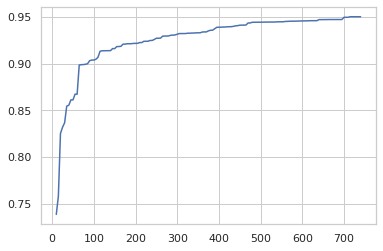

In [49]:
no_of_features = []
r2_train = []

for k in range(10,741,5):
    selector = SelectKBest(f_regression, k=k)
    X_train_transformed = selector.fit_transform(X_train_poly, y_train)
    
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    
    no_of_features.append(k)
    r2_train.append(regressor.score(X_train_transformed, y_train))

sns.lineplot(x=no_of_features, y=r2_train, legend='full')

In [50]:
selector = SelectKBest(f_regression, k=700)
X_train_transformed = selector.fit_transform(X_train_poly, y_train)
X_test_transformed = selector.transform(X_test_poly)

In [51]:
linear_model = [LinearRegression(), Ridge(), SVR(), RandomForestRegressor()]

for model in linear_model:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({'Feature':'Polynomial', 'Model': model, 'Score': score}, ignore_index=True)

model_performance = model_performance.sort_values('Score', ascending=False)
model_performance

,Model,Score,Feature
8,"(DecisionTreeRegressor(max_features='auto', ra...",9.210234e-01,Polynomial
0,"(DecisionTreeRegressor(max_features='auto', ra...",9.197939e-01,Linear
1,SVR(),8.961872e-01,Linear
6,Ridge(),8.891434e-01,Polynomial
4,LinearRegression(),8.776196e-01,Linear with Backward Elimination
7,SVR(),8.688984e-01,Polynomial
2,Ridge(),8.357927e-01,Linear
3,LinearRegression(),8.357763e-01,Linear
5,LinearRegression(),-6.259968e+21,Polynomial


We achieve a maximum of 0.92 rsquared score with Polynomial Random Forest Regressor. Thanks for reading this notebook :)